In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [84]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [85]:
import datetime as dt

In [86]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [87]:
df=data.loc['0':'365']

In [88]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['PM1']

In [89]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=3)

In [90]:
forest = RandomForestRegressor(n_estimators=1500,
                              max_depth=12,
                              max_features='auto',
                              min_samples_split=6,
                              min_samples_leaf=3,random_state=10)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=1500, random_state=10)

In [91]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8955064675230426

Score on test data: 0.7792507598021461

Root Mean Squared Error: 56.298127852111286

Overall model accuracy: 0.7792507598021461


In [92]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [93]:
predict=forest.predict(X)

In [94]:
predict

array([375.75210708, 314.00128404, 292.42832098, 274.12046273,
       248.16023275, 245.46338841, 220.14663867, 248.10749872,
       208.59937954, 200.67573369, 191.76984767, 195.71996588,
       216.30576669, 208.829091  , 202.94060484, 217.78633047,
       224.08114585, 214.84022319, 213.50939011, 213.4664286 ,
       217.147118  , 210.07800938, 222.51847443, 201.97307241,
       187.13826019, 118.55588732,  87.59142089,  82.92245345,
        79.47200923,  91.8570951 , 106.38274964,  85.5521198 ,
        80.40927304,  79.8589514 , 118.4416987 , 102.26877774,
       100.24776035,  97.38039259, 164.0980298 , 216.74813109,
       274.1729788 , 290.31401201, 282.70997362, 283.34634074,
       271.10424123, 274.35199981, 284.96625164, 283.56057708,
       281.72876596, 274.37988623, 288.08585688, 391.06022809])

In [95]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [96]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [97]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [98]:
X['pred']=predict

In [99]:
from matplotlib import style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

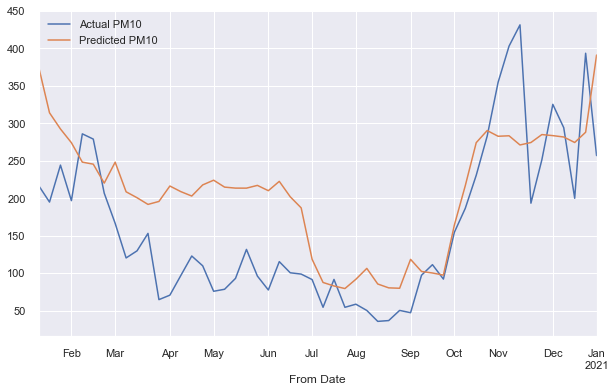

In [100]:
test['PM1'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')
plt.style.use('seaborn-white')

In [101]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 41.031287529860556
MSE: 3169.4791996526687
RMSE: 56.298127852111286
R-Squared: 0.7792507598021461


In [102]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 71.26370108858903
MSE: 7183.522943999012
RMSE: 84.75566614686602
R-Squared: 0.31300421424317104


In [103]:
import pickle
filename = 'PM10_model.sav'
pickle.dump(forest, open(filename, 'wb'))

In [104]:
pred=X.loc["2020-03-25":"2020-04-14",'pred']

In [105]:
pred.median()

208.8290909953821

In [106]:
ytest.std()

120.64206826968451

In [107]:
test['PM1'].std()

103.25433378537436

In [108]:
pred1=X.loc["2020-04-15":"2020-05-17",'pred']
pred2=X.loc["2020-08-01":"2020-11-30",'pred']
pred3=X.loc["2020-01-30":"2020-03-22",'pred']
pred2.median()

141.26986425169036

# 3rd plot

In [109]:
testcase = pd.DataFrame()

In [110]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [111]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [112]:
testcase

,test,pred,Corrected
102,370.661429,444.195970,387.897842
330,247.807143,216.827764,273.125892
240,96.570000,106.824401,50.526274
24,197.755714,204.572947,148.274819
134,68.220000,124.311233,68.013105
...,...,...,...
123,231.584286,274.797691,218.499564
214,279.338571,309.923566,253.625438
23,222.228571,257.292061,200.993934
209,282.434286,393.252550,336.954422


In [113]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [114]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8978229442156382

In [115]:
test2020=pd.DataFrame()

In [116]:
test2020['test']=test['PM1']
test2020['pred']=X['pred']

In [117]:
test2020.index=test.index

In [118]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

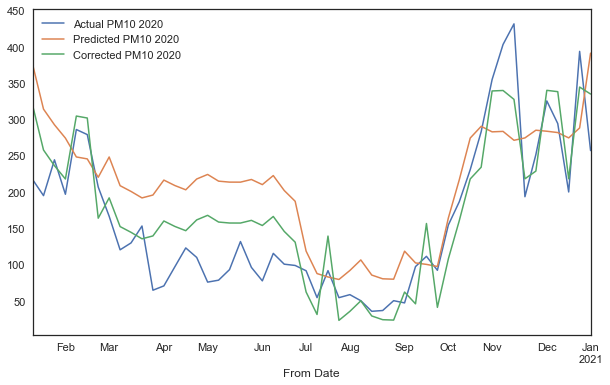

In [119]:
test2020['test'].plot(legend=True, label='Actual PM10 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM10 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM10 2020')

In [120]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.7508879715288294

In [121]:
ytest.std()

120.64206826968451